# Machine Learning Exploratory Data Analysis (EDA): Predict if Song will be Liked by Me

## Data Preparation

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/labeled_dataset.csv')
df['target'] = df['is_liked']
df = df.drop(columns=['is_liked', 'Unnamed: 0', 'Unnamed: 0.1'])
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,0
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,0
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,0
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,0


In [3]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
target                int64
dtype: object

## Checking the Missing Value

In [4]:
df.isnull().sum()[df.isnull().sum() > 0]

artists       1
album_name    1
track_name    1
dtype: int64

Only three columns have the missing value and three of them have only one record. Let see the missing value record

In [5]:
df[df.isnull().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,...,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop,0


There is only one record that has the missing value. Since the record is not a record with target equal to 1 (positive class) we can discard it from the dataset

In [6]:
df = df[~df.isnull().any(axis=1)]
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,0
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,0
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,0
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,0


## Checking the class distribution and performing a sampling

In [7]:
df['target'].value_counts(normalize=True)

target
0    0.995246
1    0.004754
Name: proportion, dtype: float64

In [8]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from imblearn.under_sampling import RandomUnderSampler\
    # , RepeatedEditedNearestNeighbours, ClusterCentroids, NeighbourhoodCleaningRule
from imblearn.over_sampling import RandomOverSampler\
    , SMOTENC, SMOTE, ADASYN, BorderlineSMOTE


# define oversampling strategy
# we will remove track_id, album_name and track_name as its not required for predictor.
# However there is still a chance for the artists since we could like a song based on who performed them.
# So the artists will be included and treated as categorical feature
X, y = df.drop(columns=['target', 'track_id', 'album_name', 'track_name']), df['target'] 
over = SMOTENC(categorical_features=['artists', 'track_genre'], sampling_strategy=0.05, random_state=42)
# # fit and apply the transform
X, y = over.fit_resample(X, y)
# define undersampling strategy
under = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X, y = under.fit_resample(X, y)

df_undersample = pd.concat([X, y], axis=1)


df_undersample

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
91238,The Killers;Ryan Pardey,0,245106,False,0.588000,0.847000,8,-4.164000,1,0.070500,0.060100,0.000000e+00,0.307000,0.662000,120.041000,4,rock,0
99764,John Denver,62,245533,False,0.406000,0.188000,7,-13.039000,1,0.032400,0.852000,0.000000e+00,0.105000,0.629000,120.757000,4,singer-songwriter,0
71895,Skindred,0,183760,False,0.583000,0.915000,0,-4.007000,1,0.081100,0.002140,0.000000e+00,0.395000,0.880000,172.097000,4,metal,0
102770,Lyn Lapid,58,190243,False,0.492000,0.227000,2,-10.679000,1,0.027700,0.772000,6.570000e-05,0.106000,0.229000,137.697000,4,songwriter,0
59037,Alphaxone,11,434000,False,0.144000,0.167000,1,-24.642000,0,0.041900,0.877000,9.670000e-01,0.114000,0.039300,103.660000,4,iranian,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,Eagles,76,393640,False,0.533000,0.360000,1,-12.633000,1,0.028200,0.080500,1.030000e-05,0.063100,0.299000,131.229000,4,rock,1
119125,Clean Bandit;Zara Larsson,76,212733,False,0.715000,0.605000,0,-5.128000,0,0.042800,0.239000,1.410000e-05,0.189000,0.454000,122.956000,4,dance,1
119126,Martin Garrix;Bebe Rexha,80,195854,False,0.660916,0.433850,4,-8.280813,0,0.032385,0.091762,2.478347e-05,0.212396,0.431065,103.553402,4,house,1
119127,Fall Out Boy,82,228458,False,0.607713,0.475443,8,-6.713909,1,0.040751,0.199800,6.372013e-07,0.350642,0.522158,170.416324,3,rock,1


In [11]:
df_undersample[df_undersample['target'] == 1].sort_values(by=['artists'])

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,target
115955,3 Doors Down,76,238733,False,0.557000,0.533000,10,-6.817000,0,0.025200,0.049200,0.000000e+00,0.205000,0.233000,143.994000,4,grunge,1
115888,3 Doors Down,76,238733,False,0.557000,0.533000,10,-6.817000,0,0.025200,0.049200,0.000000e+00,0.205000,0.233000,143.994000,4,alternative,1
117301,3 Doors Down,68,238023,False,0.657441,0.429984,3,-7.674612,0,0.027089,0.724644,1.674017e-05,0.113144,0.464787,127.596360,3,edm,1
118948,3 Doors Down,75,238677,False,0.560051,0.546486,9,-6.779792,0,0.027375,0.045381,3.277876e-07,0.218092,0.259774,141.450939,4,alt-rock,1
118480,3 Doors Down,68,237950,False,0.659595,0.456048,1,-7.585351,1,0.030733,0.697711,1.679150e-05,0.138200,0.503335,123.765046,3,alternative,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5064,the peggies,62,227013,False,0.564000,0.922000,2,-2.303000,1,0.036800,0.001980,5.030000e-06,0.231000,0.828000,139.962000,4,anime,1
62118,『ユイカ』,65,298663,False,0.607000,0.498000,0,-6.363000,1,0.031100,0.239000,4.040000e-06,0.313000,0.714000,164.993000,4,j-pop,1
62559,あれくん;『ユイカ』,54,214036,False,0.713000,0.651000,1,-5.853000,1,0.025500,0.152000,3.580000e-06,0.092700,0.945000,108.015000,4,j-pop,1
62707,もさを。,61,269746,False,0.773000,0.363000,4,-7.304000,1,0.038300,0.814000,0.000000e+00,0.103000,0.774000,119.994000,4,j-pop,1


In [12]:
df_undersample.to_csv('data/sampled_dataset.csv')

## Check Distribution of Data

In [11]:
import pandas as pd

df_undersample = pd.read_csv("data/sampled_dataset.csv").drop(columns='Unnamed: 0')

/tmp/ipykernel_2820/2537004841.py:35: RuntimeWarning: divide by zero encountered in divide
  modified_z_score = 0.6745 * diff / med_abs_deviation
/tmp/ipykernel_2820/2537004841.py:35: RuntimeWarning: invalid value encountered in divide
  modified_z_score = 0.6745 * diff / med_abs_deviation
/opt/conda/envs/ml-zoomcamp/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6854: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


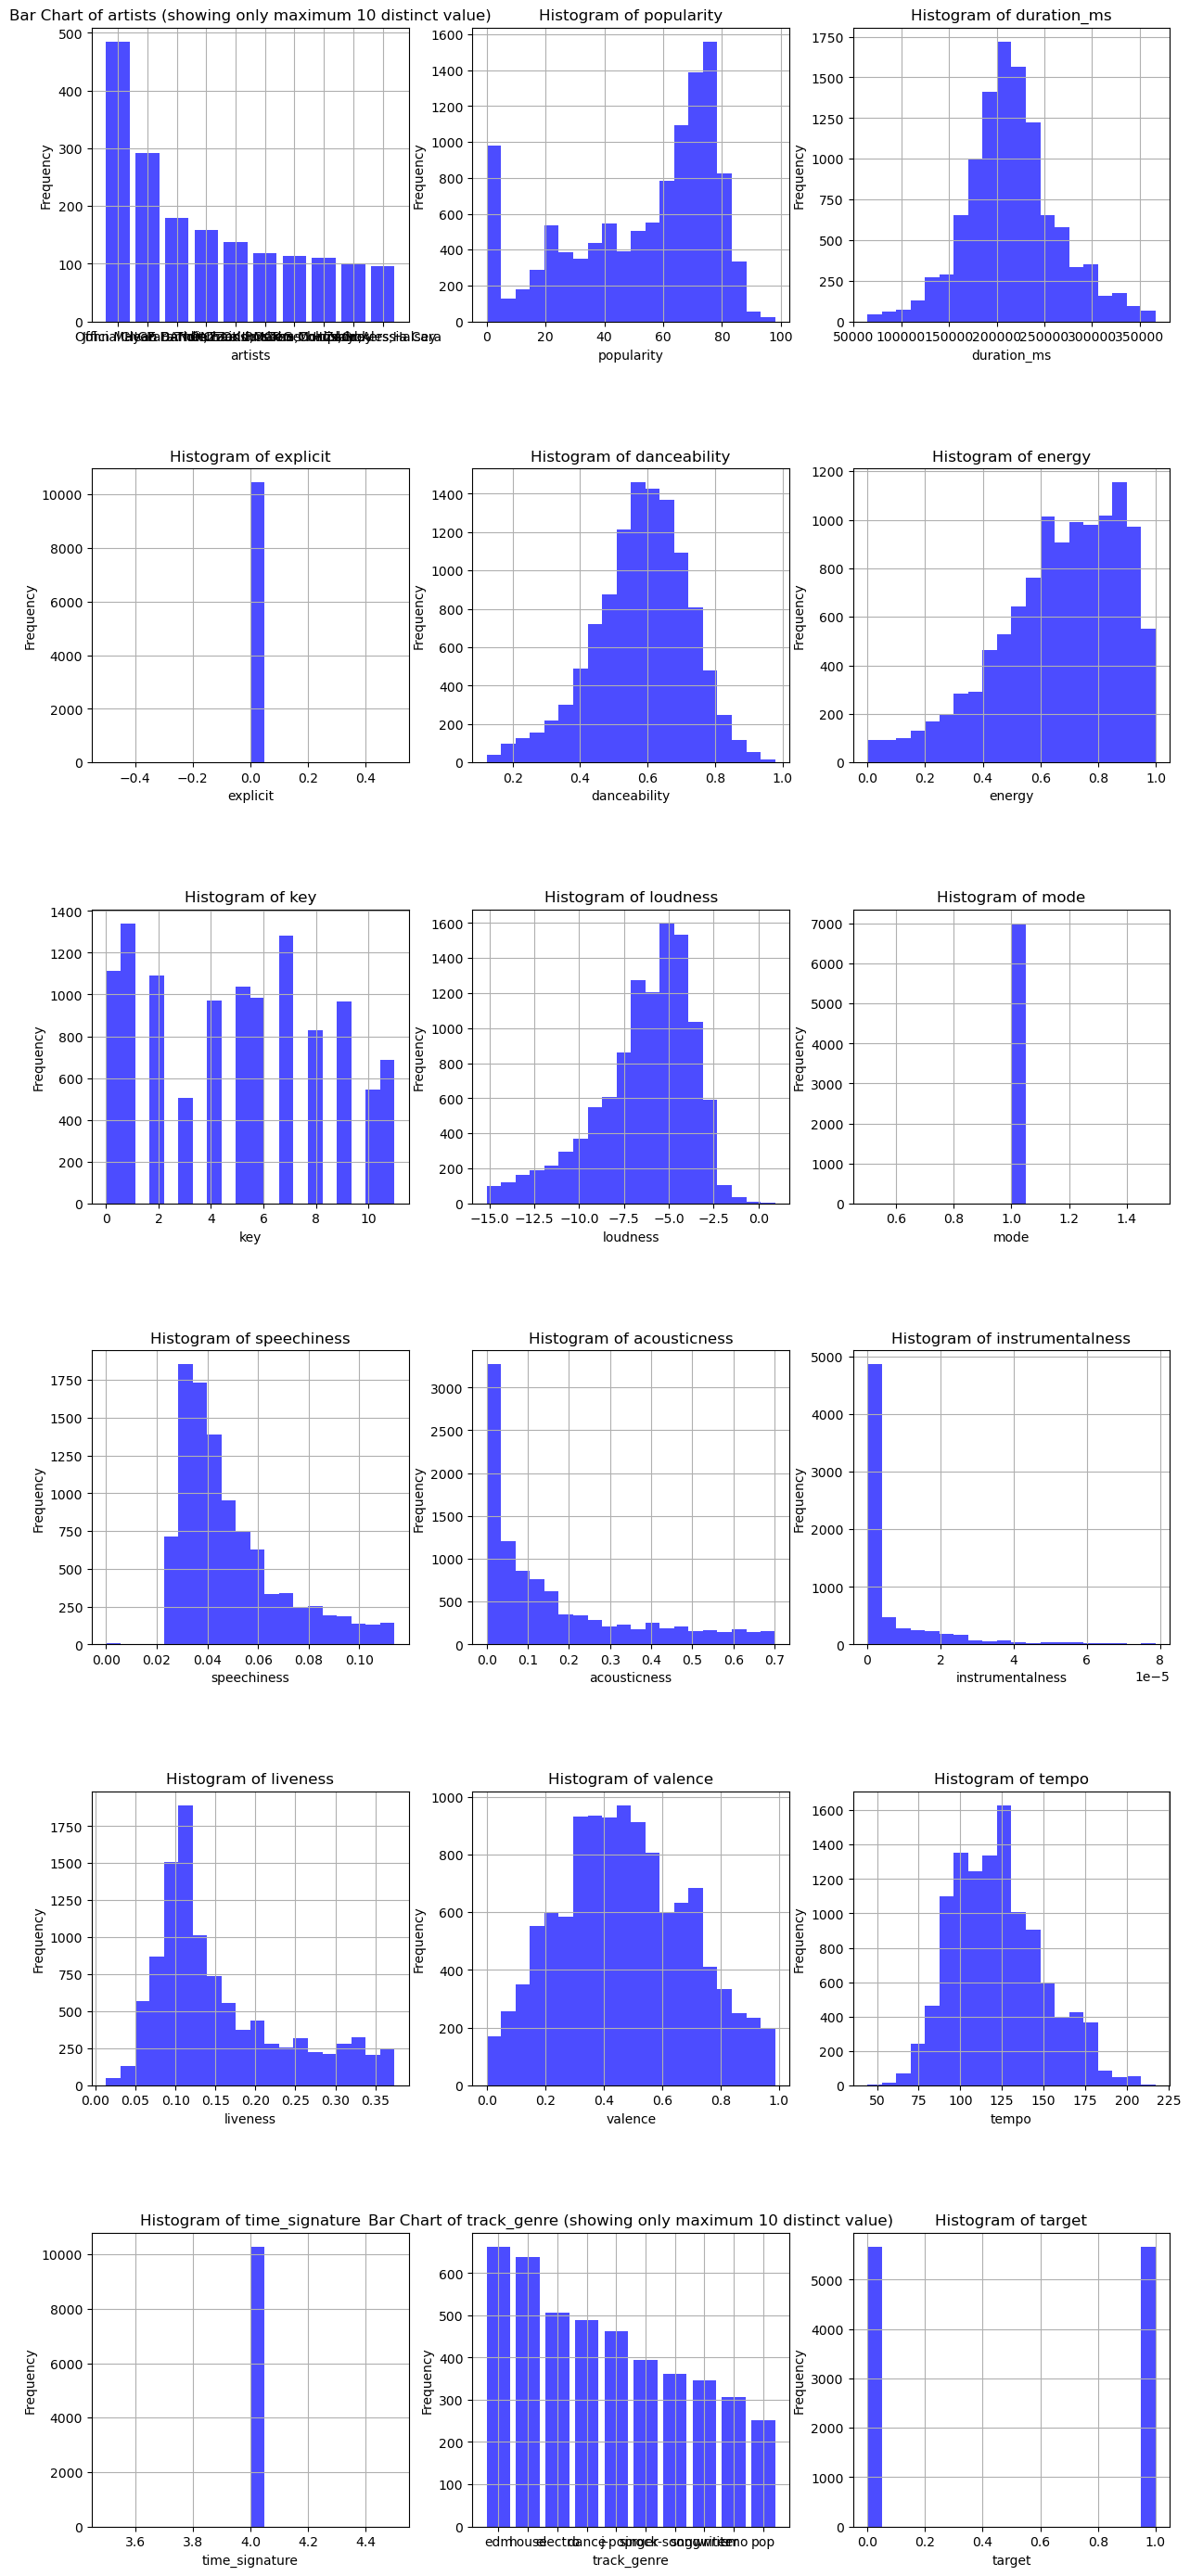

In [12]:
import matplotlib.pyplot as plt
import numpy as np

cols_to_check = df_undersample.columns

def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

# Set the number of rows (N) and columns (M) for the grid
total_col = len(cols_to_check)
N, M = total_col // 3, 3

# Create subplots in a grid layout
fig, axes = plt.subplots(N, M, figsize=(15, 5 * (total_col // 3 + 1)))
fig.subplots_adjust(hspace=0.5)

for i, col_name in enumerate(cols_to_check):
    row = i // M
    col = i % M

    ax = axes[row, col]

    # Check if the column is numerical
    if pd.api.types.is_numeric_dtype(df_undersample[col_name]):
        series = df_undersample[col_name].to_numpy()
        filtered = series[~is_outlier(series)]
        ax.hist(filtered, bins=20, color='blue', alpha=0.7)
        ax.set_title(f'Histogram of {col_name}')
        ax.set_xlabel(col_name)
        ax.set_ylabel('Frequency')
        ax.grid(True)
    else:
        categorical_counts = df_undersample[col_name].value_counts()[:10]
        # print(categorical_counts)
        ax.bar(categorical_counts.index, categorical_counts, color='blue', alpha=0.7)
        # categorical_counts.plot(kind='bar', color='green', alpha=0.7, ax=ax)
        ax.set_title(f'Bar Chart of {col_name} (showing only maximum 10 distinct value)')
        ax.set_xlabel(col_name)
        ax.set_ylabel('Frequency')
        ax.grid(True)
    # else:
    #     ax.axis('off')  # Don't display non-numeric columns

# Remove any empty subplots
for i in range(len(cols_to_check), N * M):
    row = i // M
    col = i % M
    fig.delaxes(axes[row, col])

plt.show()

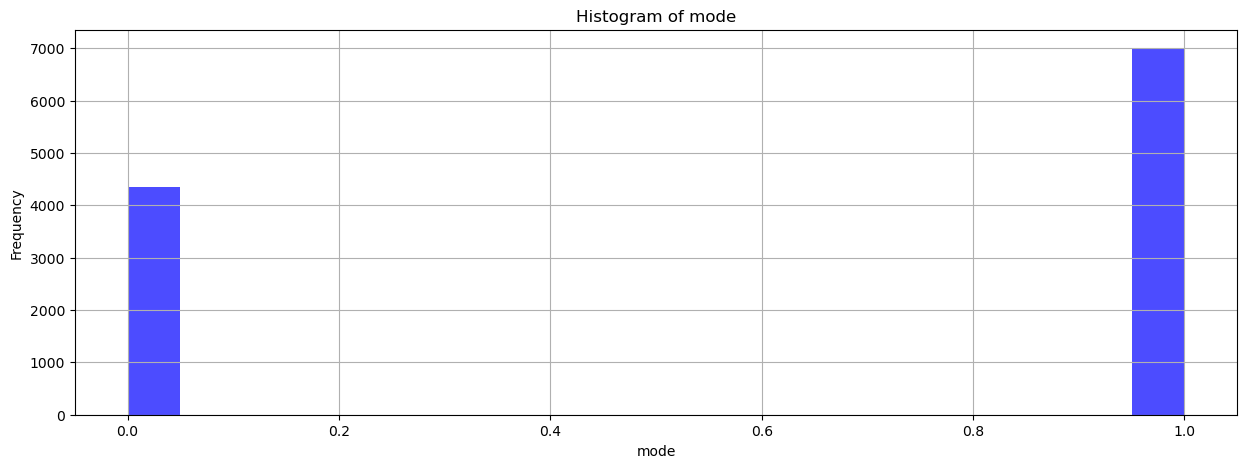

In [13]:
col_name = 'mode'

plt.figure(figsize=(15, 5))
plt.title(f'Histogram of {col_name}')
plt.xlabel(col_name)
plt.ylabel('Frequency')

series = df_undersample[col_name].to_numpy()
filtered = series[series < 2]

plt.hist(filtered, bins=20, color='blue', alpha=0.7)
plt.grid(True)

plt.show()

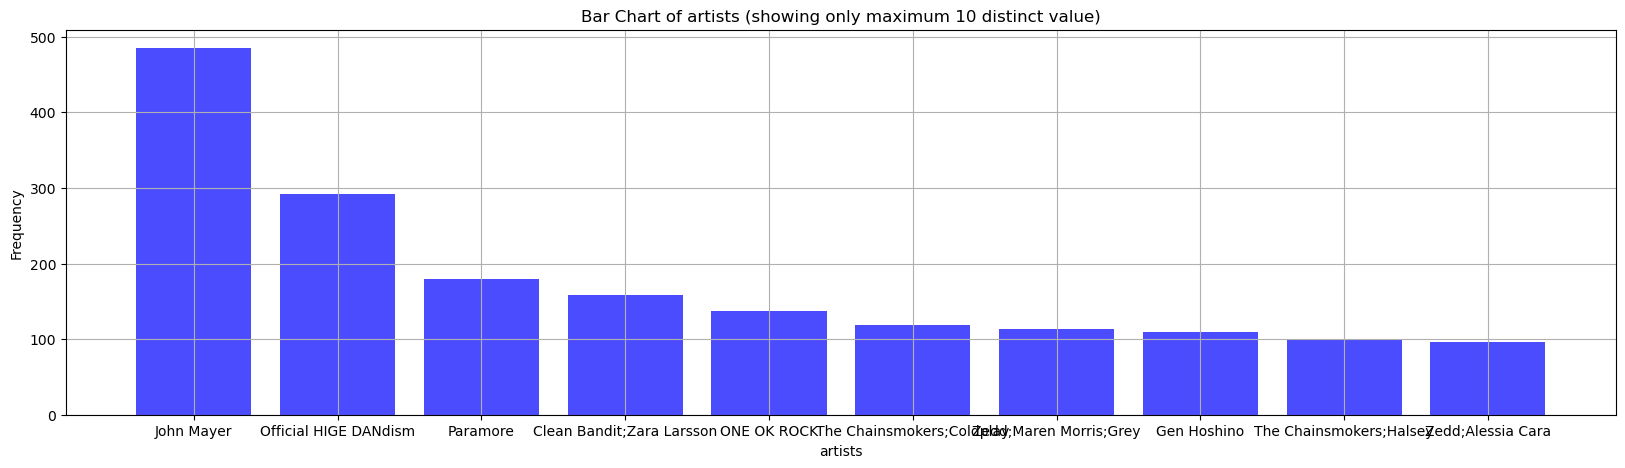

In [14]:
col_name = 'artists'

plt.figure(figsize=(20, 5))
plt.title(f'Bar Chart of {col_name} (showing only maximum 10 distinct value)')

categorical_counts = df_undersample[col_name].value_counts()[:10]
        # print(categorical_counts)
plt.bar(categorical_counts.index, categorical_counts, color='blue', alpha=0.7)
        # categorical_counts.plot(kind='bar', color='green', alpha=0.7, ax=ax)
plt.xlabel(col_name)
plt.ylabel('Frequency')
plt.grid(True)

In [15]:
categorical_counts = df_undersample[col_name].value_counts()
categorical_counts

artists
John Mayer                                 485
Official HIGE DANdism                      292
Paramore                                   179
Clean Bandit;Zara Larsson                  158
ONE OK ROCK                                137
                                          ... 
Marco Antonio Muñiz                          1
Fungus Funk;Kabayun;Ingrained Instincts      1
Burn The Priest                              1
Mohit Chauhan                                1
Emilie Mover                                 1
Name: count, Length: 4245, dtype: int64

> PS: The increased the number of artists is caused due to SMOTE oversampling

## Perform the Feature Importance Analysis

In [16]:
categorical_cols, numerical_cols = [], []
for i, col_name in enumerate(cols_to_check):
    if col_name == 'target':
        continue
    # Check if the column is numerical\
    if pd.api.types.is_numeric_dtype(df_undersample[col_name]):
        numerical_cols.append(col_name)
    else:
        categorical_cols.append(col_name)

categorical_cols, numerical_cols

(['artists', 'track_genre'],
 ['popularity',
  'duration_ms',
  'explicit',
  'danceability',
  'energy',
  'key',
  'loudness',
  'mode',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo',
  'time_signature'])

### Checking the feature importance of Categorical Columns using Mutual Info score

In [17]:
from sklearn.metrics import mutual_info_score

for col in categorical_cols:
    print(col, round(mutual_info_score(df_undersample[col], df_undersample["target"]), 3))

artists 0.662
track_genre 0.382


### Checking the feature importance of Numerical Columns using Correlation Analysis

In [18]:
ft_analysis = {
    "col": [],
    "abs_corr": []
}
for col in numerical_cols:
    ft_analysis['col'].append(col)
    ft_analysis['abs_corr'].append(abs(round(df_undersample[col].corr(df_undersample["target"]), 3)))

pd.DataFrame(ft_analysis).sort_values(by='abs_corr')

,col,abs_corr
14,time_signature,0.014
13,tempo,0.024
1,duration_ms,0.026
12,valence,0.032
2,explicit,0.033
7,mode,0.062
5,key,0.063
3,danceability,0.104
4,energy,0.137
11,liveness,0.149


The result of feature importance analysis show that popularity and `artists` (categorical column) and `popularity` (numerical column) has the highest correlation when we try to calculate it with the `target` attribute. Meanwhile the `time_signature` has the lowest score in correlation with the target column. Hence we can remove it from dataset

In [19]:
excluded_columns = [
    'time_signature'
]

df_ready_to_used = df_undersample.copy()
used_cols = [
    col for col in categorical_cols + numerical_cols
    if col not in excluded_columns
]
used_cols = used_cols + ['target']

df_ready_to_used = df_ready_to_used[used_cols]
df_ready_to_used

,artists,track_genre,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,target
0,The Killers;Ryan Pardey,rock,0,245106,False,0.588000,0.847000,8,-4.164000,1,0.070500,0.060100,0.000000e+00,0.307000,0.662000,120.041000,0
1,John Denver,singer-songwriter,62,245533,False,0.406000,0.188000,7,-13.039000,1,0.032400,0.852000,0.000000e+00,0.105000,0.629000,120.757000,0
2,Skindred,metal,0,183760,False,0.583000,0.915000,0,-4.007000,1,0.081100,0.002140,0.000000e+00,0.395000,0.880000,172.097000,0
3,Lyn Lapid,songwriter,58,190243,False,0.492000,0.227000,2,-10.679000,1,0.027700,0.772000,6.570000e-05,0.106000,0.229000,137.697000,0
4,Alphaxone,iranian,11,434000,False,0.144000,0.167000,1,-24.642000,0,0.041900,0.877000,9.670000e-01,0.114000,0.039300,103.660000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11339,Eagles,rock,76,393640,False,0.533000,0.360000,1,-12.633000,1,0.028200,0.080500,1.030000e-05,0.063100,0.299000,131.229000,1
11340,Clean Bandit;Zara Larsson,dance,76,212733,False,0.715000,0.605000,0,-5.128000,0,0.042800,0.239000,1.410000e-05,0.189000,0.454000,122.956000,1
11341,Martin Garrix;Bebe Rexha,house,80,195854,False,0.660916,0.433850,4,-8.280813,0,0.032385,0.091762,2.478347e-05,0.212396,0.431065,103.553402,1
11342,Fall Out Boy,rock,82,228458,False,0.607713,0.475443,8,-6.713909,1,0.040751,0.199800,6.372013e-07,0.350642,0.522158,170.416324,1


In [20]:
df_ready_to_used.to_csv("./data/dataset_eda_and_preprocessed.csv")